# Paso 1: importacion de todos los recursos necesarios y análisis inicial
Se importa todo lo necesario para el análisis a lo largo de este proyecto incluido también el Data Frame con el nombre de 'games'

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
import scipy.stats as st 
import math

games = pd.read_csv('games.csv')

### Análisis

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Preparar Datos

### 1.- Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [4]:
new_columns_names = []

for old_columns in games.columns:
    stripped = old_columns.strip()
    lowered = stripped.lower()
    new_columns_names.append(lowered)

games.columns = new_columns_names
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.- Convierte los datos en los tipos necesarios.

Corrección de la columna "year_of_release" 

In [5]:
mean_year = games['year_of_release'].mean()

games['year_of_release'] = games['year_of_release'].fillna(mean_year)
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'] = games['year_of_release'].astype(str)

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Reemplazo de los dos valores nulos en la columna género y título de juego

In [6]:
games['name'] = games['name'].fillna('Unknown')
games['platform'] = games['platform'].fillna('Unknown')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


### 3.- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Las columnas en la que se ralizaron cambios fueron 3:

year_of_release: por alguna razón el año estaba como dato flotante, lo que se tuvo que corregir, fuera de eso lo que llamó la atención es que habían mucho valores nules. Primero consideré colocar el valor de 0 por si necesitaba localizar los juegos sin año más adelante, pero después de pensarlo no sirve en este análisis separar a los juegos de lo que no se conoce año, por lo que decidí colocarles el valor medio de los años, corroboré con la gráfica que está más adelante para asegurarme que no cambiara significativamente ningún año.

name y platform: habían únicamente dos valores nulos en estas columnas, siendo no significativa la ausencia pero con tal de no perder estos valores, se sustituyó el valor nulo por "Unknown" así sabremos que es de los dos juegos que no sabemos ya sea, plataforma, nombre o ambos. sé que esto pudo haber sido hecho con los valores ausentes después pero era una insignificacia y los valores nulos que importan son numéricos para el análisis, ahí centraré otro espacio.

### 4.- Si es necesario, elige la manera de tratar los valores ausentes:
        

In [7]:
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].mean())

games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype('float')
games['user_score'] = games['user_score'].fillna(games['user_score'].mean())
games['rating'] = games['rating'].fillna('Unknown')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

critic_score: Se encontraron muchos valores nulos, lo que me preocupó en un inicio, me cuastioné si era prudente colocar los valores ausentes con la media, pero el sesgo tendrá que ser asumido por ahora, y esperemos no sea muy grande.

user_score: tenía valores "str" que tuvieron que ser devueltos a valores nulos, para poder convertir los valres en "float" que posteriormente ayudaron a conseguir el mean que sustituyó a los valores ausentes en la base de datos permitiendonos así dejar esa columna lista para el análisis.

rating: Aquí dado que el raiting es un "str" hice lo mismo que en la sección anterior, haciendo que los valores nulos sean sustituidos por "unknown" que nos ayudará a mantener como valores validos y a la hora del análisis sabremos que los valores desconocidos estarán analizados aparte si es necesario.

#### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

en caso de los "score" puede ser porque son juegos muy pequeños que no han tenido críticas ni de criticos ni de usuarios, y podría ser que eso mantenga en NaN el valor, al igual que los valores desconocidos de "rating" donde puede que no se haya logrado colocar un rating a esos juegos.

#### Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

en este caso los TBD es casi igual que un valor nulo, aunque "estén a punto de colocar el valor" no se ha colocado, por lo que entenderlos como valores nulos ayuda a facilitar el análisis. si la compañia después me dijera que ya tienen determinados esos valores podemos volver a correr el algoritmo con los nuevos valores, pero si me están pidiendo un análisis ahora, y no están determinados los trataré igual que un valor nulo



### 5.- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [8]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.967679,7.125046,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.500000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.600000,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.400000,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68.967679,7.125046,Unknown,28.31


# Analizar los datos


### 1.- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

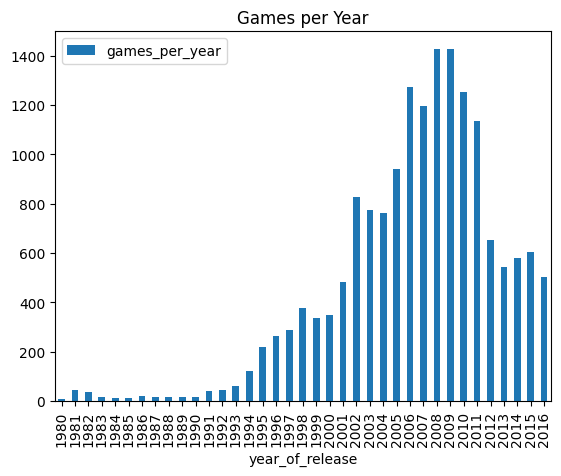

In [9]:
games_per_year = games.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'games_per_year']
hist_games_per_year = games_per_year.plot.bar(x='year_of_release', y='games_per_year', title='Games per Year')

Aquí hice el análisis, primero colocando los años ausente con el valor 0, una vez que distinguí que no era un número de datos significativo decidí colocar el valor promedio del año a los juegos que no tenían año, así que el año promedio sí recibió un poco más de datos, pero la gráfica en términos generales no cambia, y el análisis se puede llevar con normalidad.

Aquí tenemos una g´rafica sesgada a la izquierda con una forma que parece normal, es bueno sabiendo que si la gráfica siguiera solamente en aumento el análisis se hubiera tenido que llevar de una manera diferente.

Podemos ver que los años que producieron más videojuegos son el 2008 y 2009 con casi el mismo número de juegos.

Ahora, esto no nos habla mucho solo, si queremos predecir en algún momento si las ventas mejorarán o no, tenemos que compararlo con las ventas totales, o de la región según lo que nos interese.

### 2.- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

##### Graficas comparativas de ventas contra juegos lanzados.

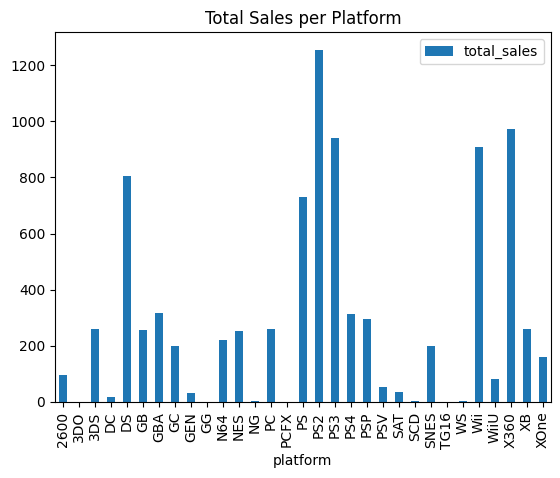

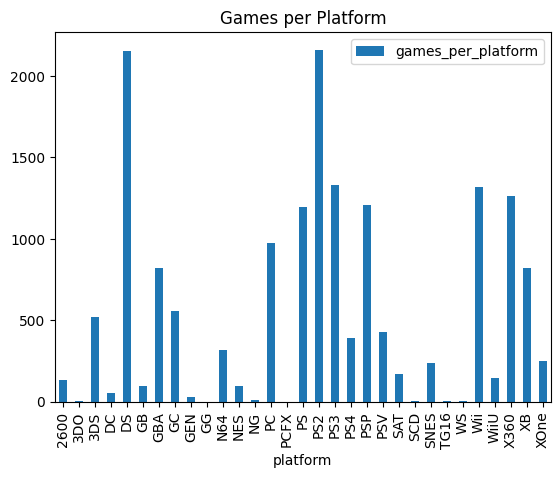

In [10]:
sales_per_platform = games.groupby('platform')['total_sales'].sum().reset_index()
sales_per_platform.columns = ['platform', 'total_sales']
hist_sales_per_platform = sales_per_platform.plot.bar(x='platform', y='total_sales', title='Total Sales per Platform')

games_per_plataform = games.groupby('platform')['name'].count().reset_index()
games_per_plataform.columns = ['platform', 'games_per_platform']
hist_games_per_plataform = games_per_plataform.plot.bar(x='platform', y='games_per_platform', title='Games per Platform')

##### Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

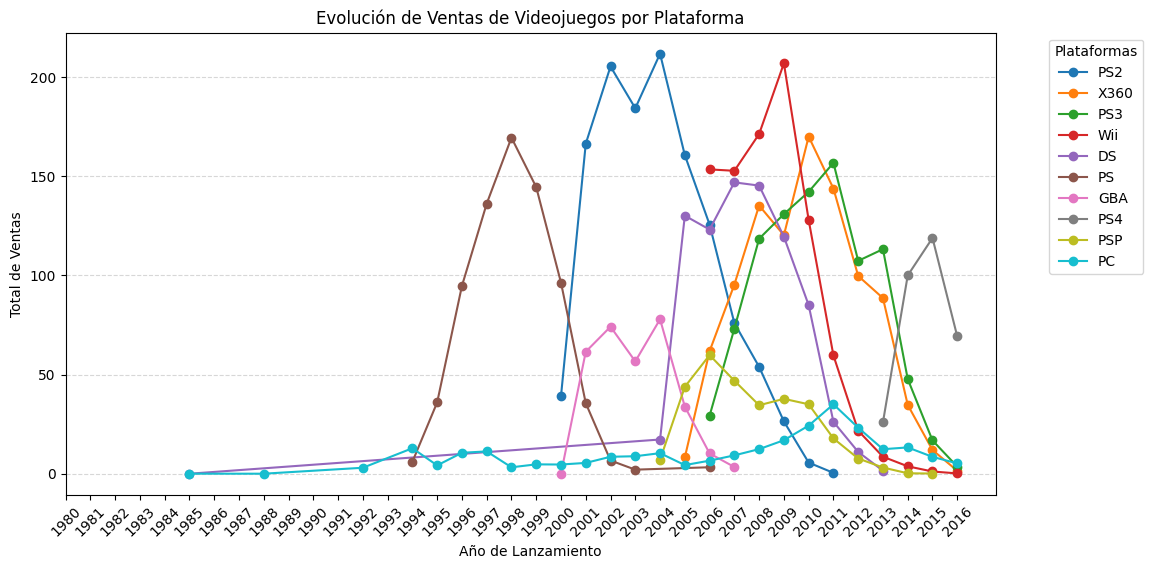

In [11]:
# Asegurar que los años están en formato numérico, se tuvo que regresar a int para evitar errores en el orden de los años
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce')

# Ordenar el DataFrame por año antes de cualquier agrupación
games = games.sort_values(by='year_of_release')

# Obtener las 10 plataformas con más ventas
top_platform_sellers = sales_per_platform.nlargest(10, 'total_sales')

plt.figure(figsize=(12, 6))

# Iterar sobre cada plataforma y graficar su total de ventas por año
for platform in top_platform_sellers['platform'].unique():
    platform_sales = games[games['platform'] == platform].groupby('year_of_release')['total_sales'].sum().reset_index()
    plt.plot(platform_sales['year_of_release'], platform_sales['total_sales'], label=platform, marker='o')


plt.title('Evolución de Ventas de Videojuegos por Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total de Ventas')
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.xticks(games['year_of_release'].unique(), rotation=45)  # Rotar etiquetas del eje X para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Agregar líneas de referencia en el eje Y


plt.show()






##### Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

aunque se ve algo confuso podemos ver cómo las 10 primeras plataformas en ventas tienen inicio y final en algunos casos, 

Las plataformas que ya no venden son:
1. PS desde 1994 a 2006 
2. GBA desde 2000 a 2007
3. PS2 desde 2000 a 2011
4. DS En teoría desde 1985 pero contamos desde 2004 a 2013
5. PSP desde 2004 a 2015

Las plataformas que siguen aparecieron en:
1. PC desde 1985
2. xbox360 desde 2005
3. Wii desde 2006
4. PS3 desde 2006
5. PS4 desde 2013

Aquí cabe aclarar que hay plataformas que en total no han vendido tanto como otras, pero que se eliminaron y nos hacen creer que las plataformas ya no van a vender, por lo que se debería de discriminar por los últimos años de mejor manera para poder hacer correctamente la predicción, caso ejemplar es el tema de Xbox one

##### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Por lo general la vida útil de las consolas es de una década, un poco más según el gráfico, excepto en el caso de PC, que aunque no es dominante en ventas cada año es consistente y es una plataforma que seguirá existiendo porque es todo juego que se pueda correr en una computadora.

### 3.- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Si quisieramos hacer una predicción para 2017 y sabemos que aproximadamente una década es la vida útil de las plataformas deberíamos tomar los 10 años anteriores y de ahí tomar la predicción para 2017

### 4.- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [12]:
games_since_2006 = games[games['year_of_release'] > 2005]

### 5.- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [13]:
sales_since_2006 = games_since_2006.groupby('platform')['total_sales'].sum().reset_index()
sales_since_2006.columns = ['platform', 'total_sales']
sales_since_2006.sort_values(by='total_sales', ascending=False, inplace=True)
print(sales_since_2006)

   platform  total_sales
17     X360       963.17
11      PS3       939.65
15      Wii       907.51
3        DS       658.69
12      PS4       314.14
10      PS2       288.01
1       3DS       259.00
13      PSP       243.15
8        PC       167.18
19     XOne       159.32
16     WiiU        82.19
14      PSV        54.07
18       XB        16.94
6        GC        13.73
5       GBA        13.65
0      2600        10.50
9        PS         3.28
4        GB         1.03
7       N64         0.67
2        DC         0.06


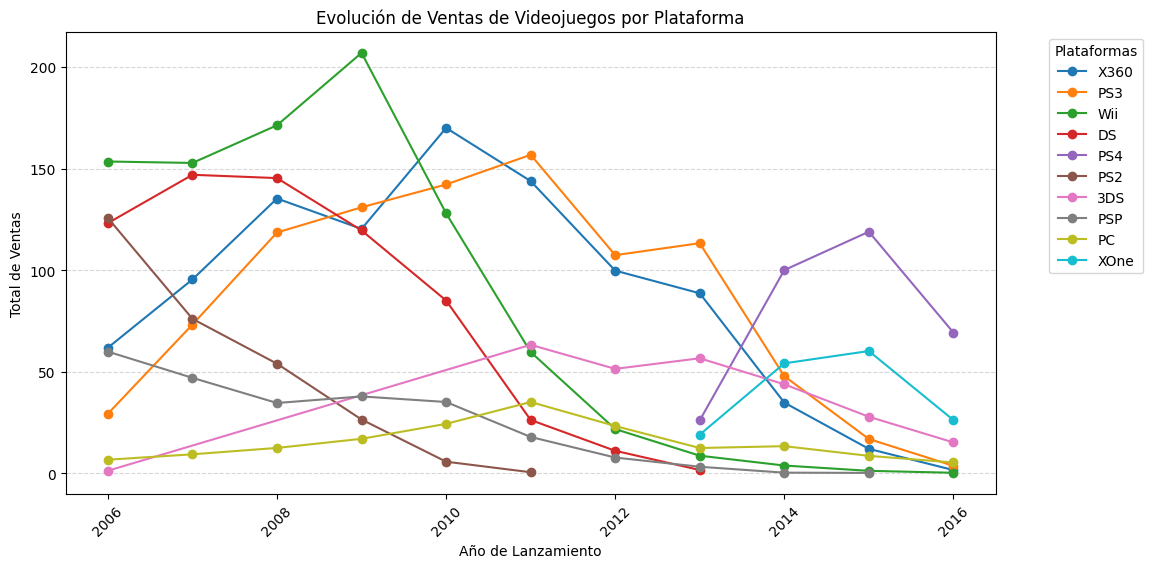

In [14]:
sales_since_2006 = sales_since_2006.nlargest(10, 'total_sales')

plt.figure(figsize=(12, 6))

for platform in sales_since_2006['platform'].unique():
    platform_sales = games[games['platform'] == platform].groupby('year_of_release')['total_sales'].sum().reset_index()
    platform_sales = platform_sales[platform_sales['year_of_release'] > 2005]
    plt.plot(platform_sales['year_of_release'], platform_sales['total_sales'], label=platform, marker='o')


plt.title('Evolución de Ventas de Videojuegos por Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total de Ventas')
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.5)  

plt.show()

Aunque tomemos solamente los datos que están desde 2006 el los últimos años vemos la clara reducción de la compar de videojuegos. aún las plataformas más nuevas están en un declive claro, y es malo desde que las platafrmas anteriores como xbox360 no decaía tan rápidamente, la esperanza es que se recuperen, pero para eso tendríamos que analisar si las plataformas van a sacar algún juego exclusivo o especial, en el caso de los datos sabemos que en el 2018 se sacará Red Dead Redemption 2 o para el año 2017 exclusivo de Xbox One estaba Cup Head, pero aún en el caso de tener un juego esperado eso no asegura que toda la plataforma se levante.

### 6.- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

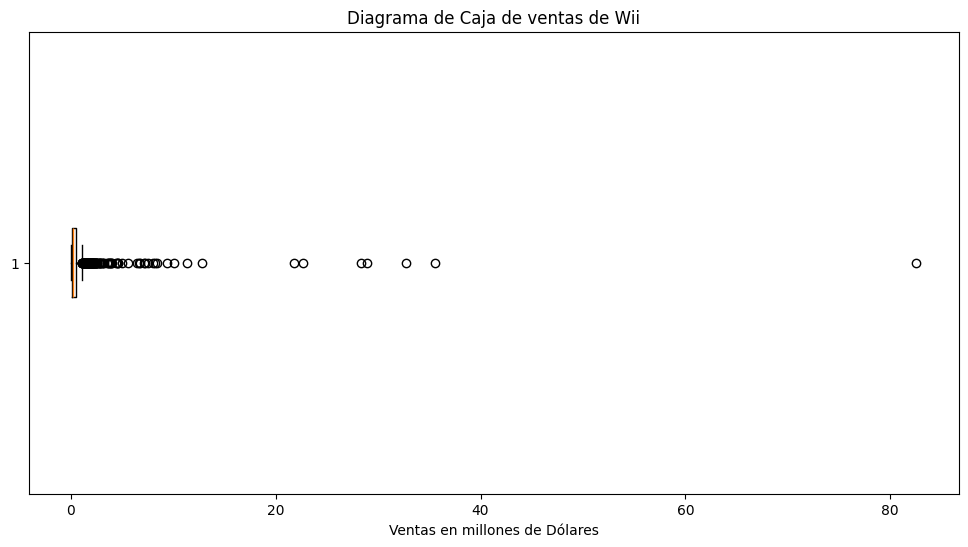

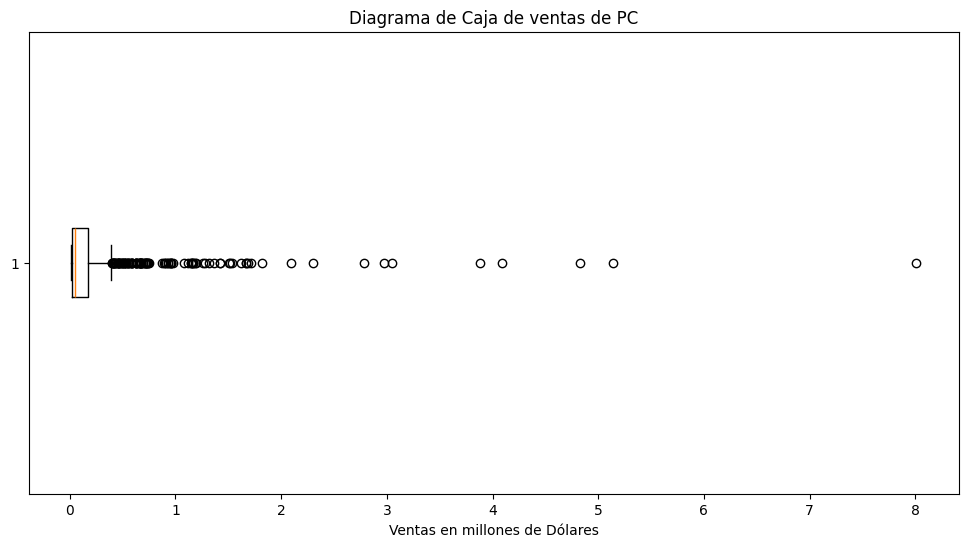

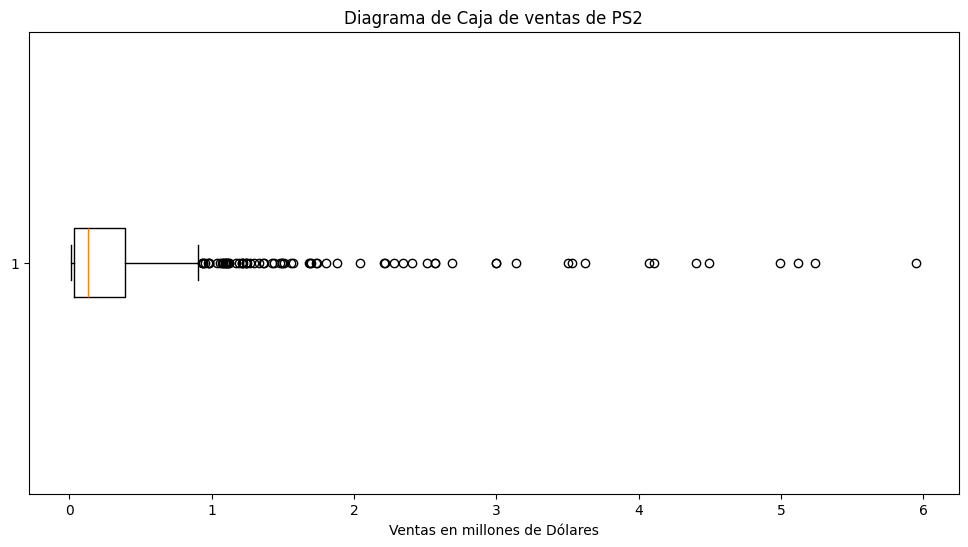

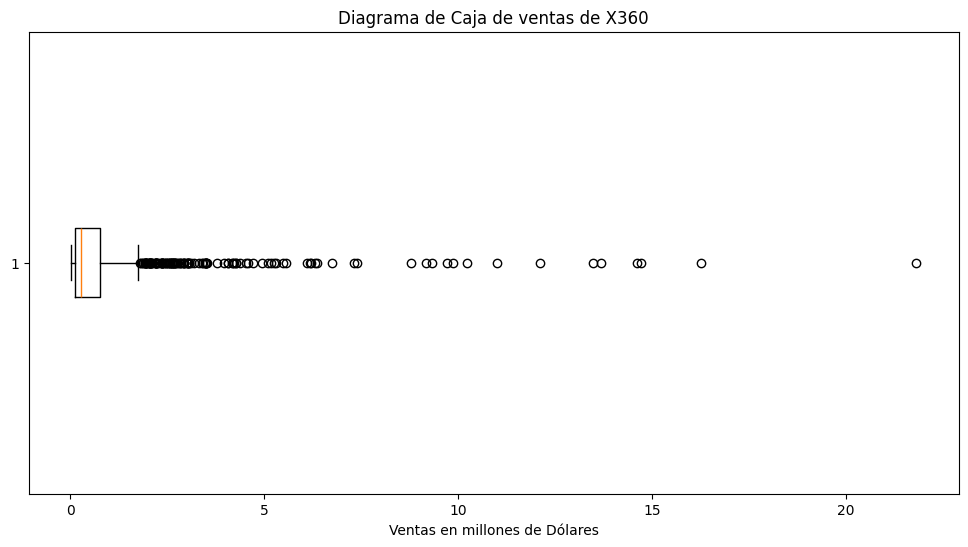

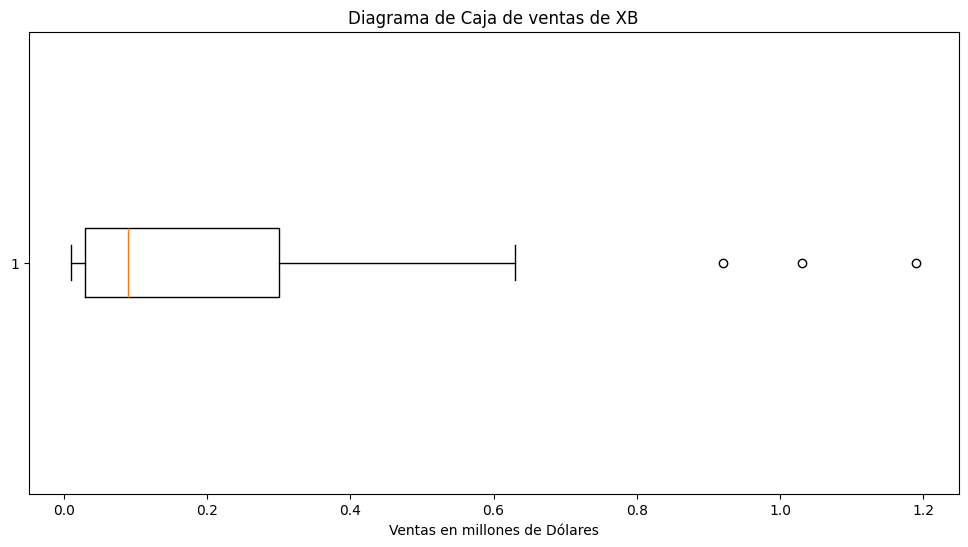

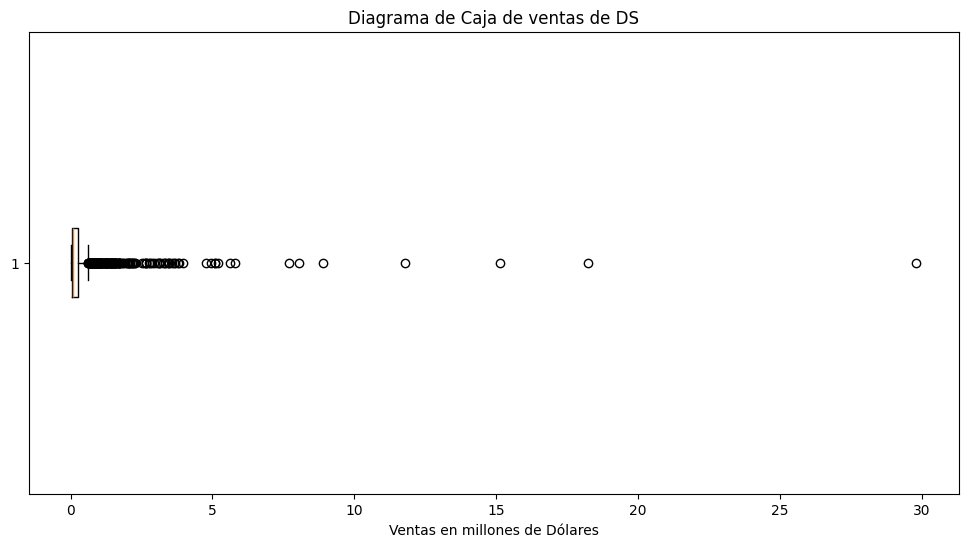

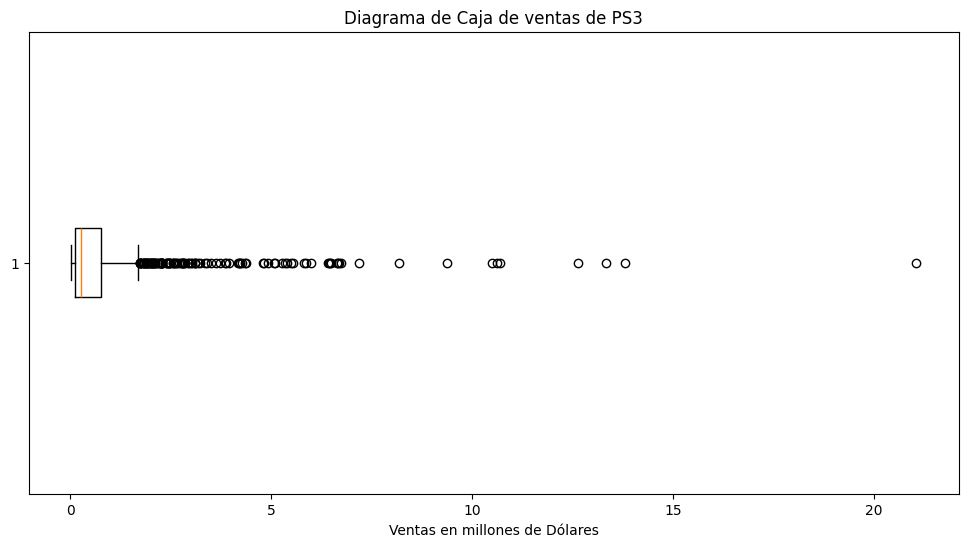

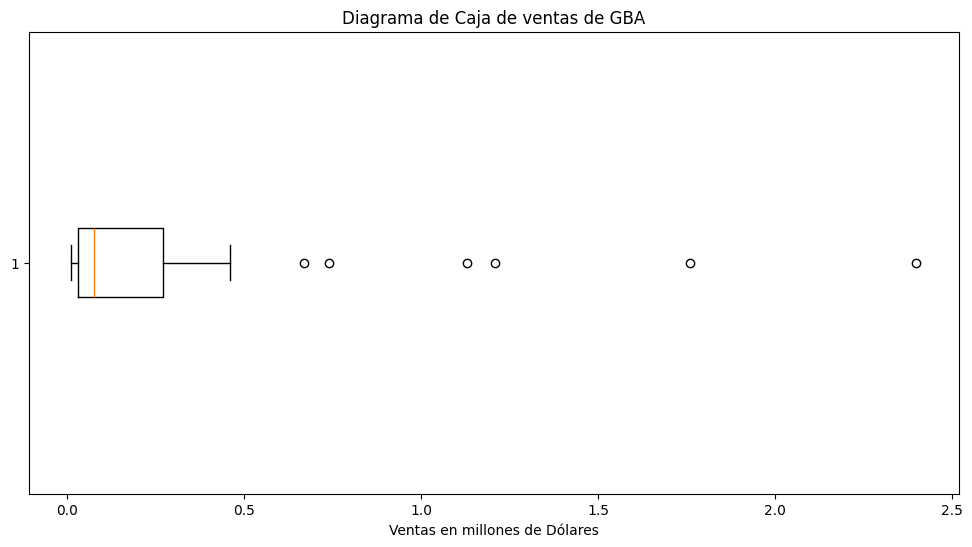

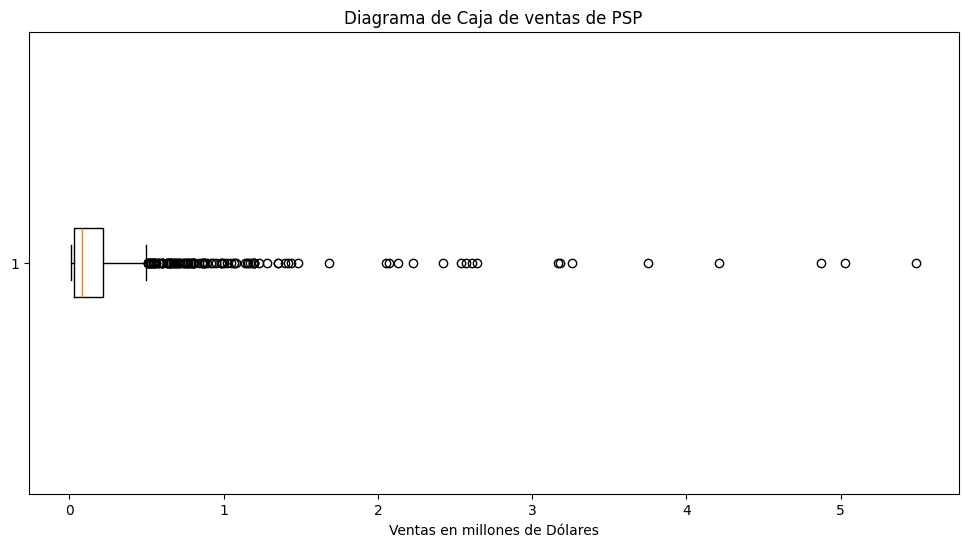

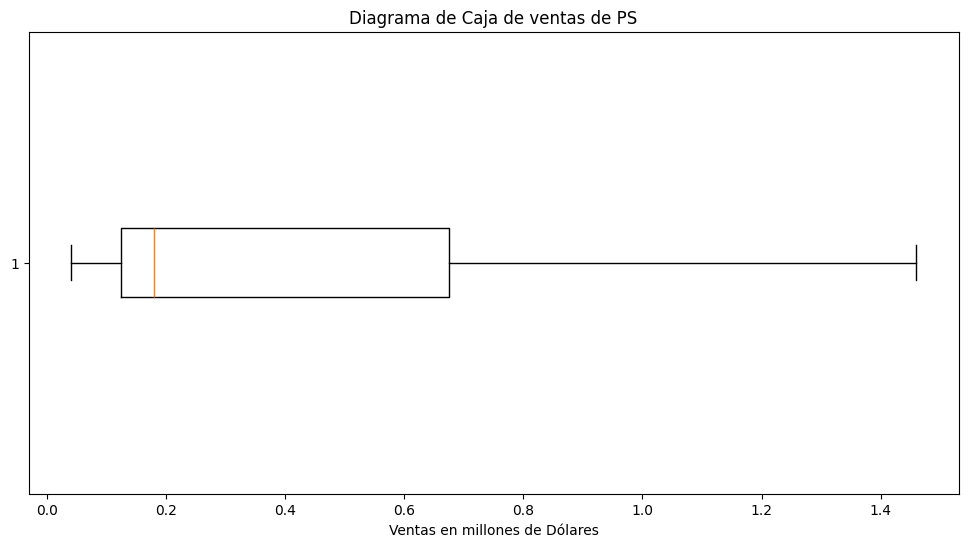

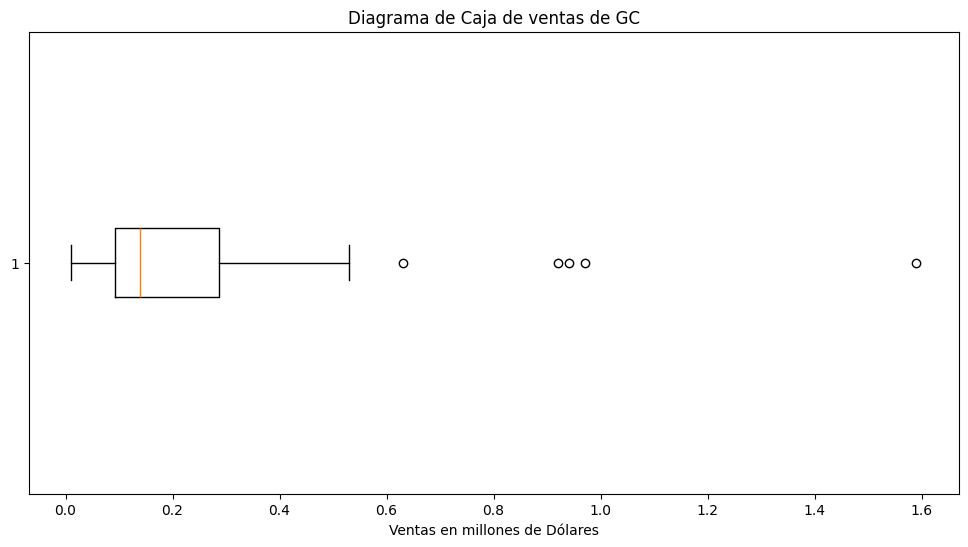

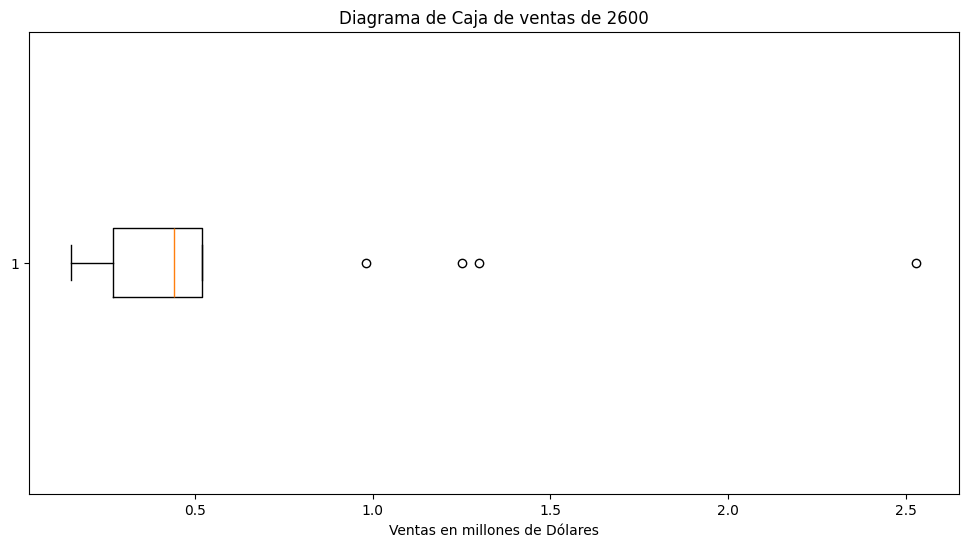

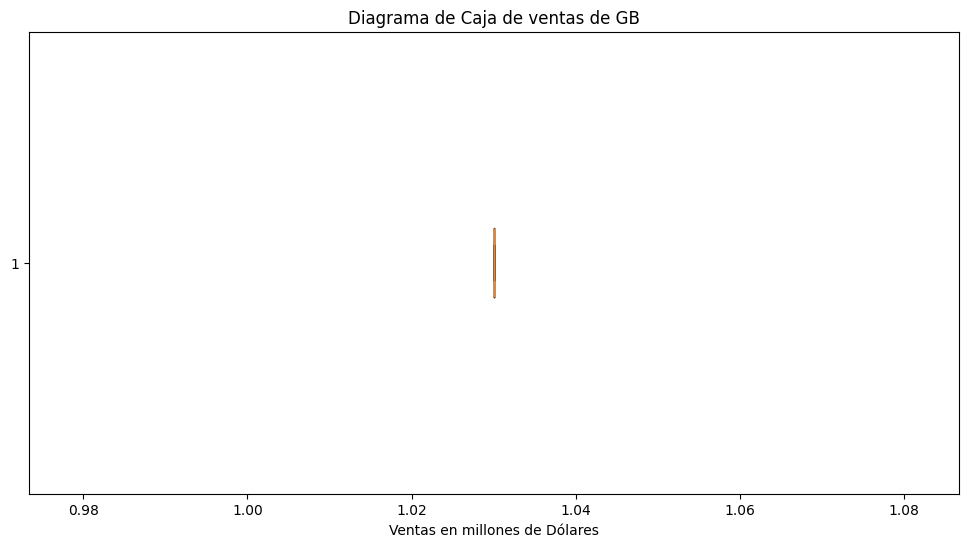

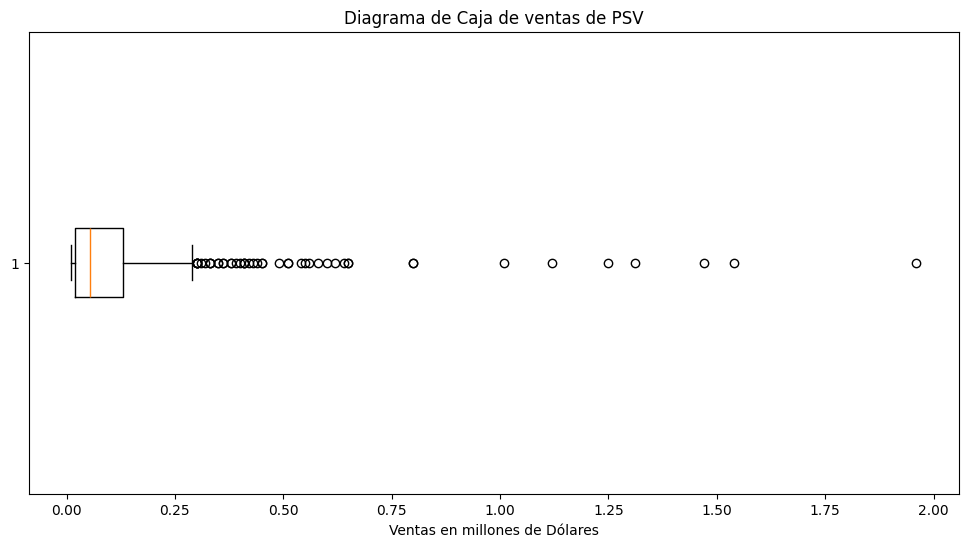

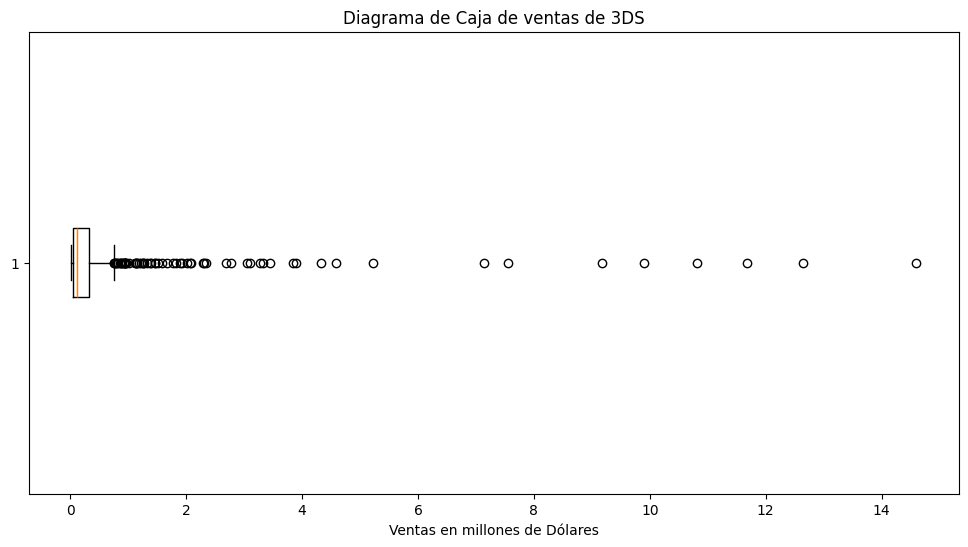

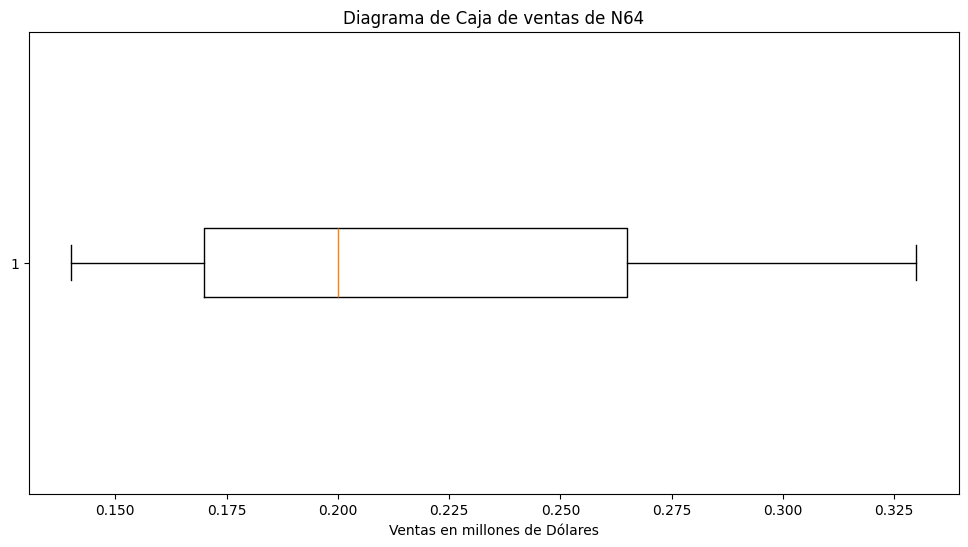

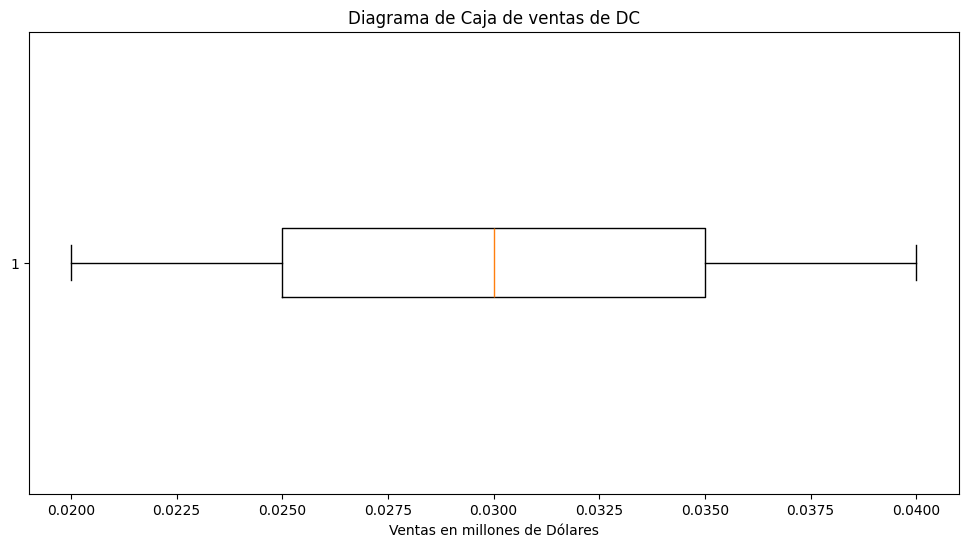

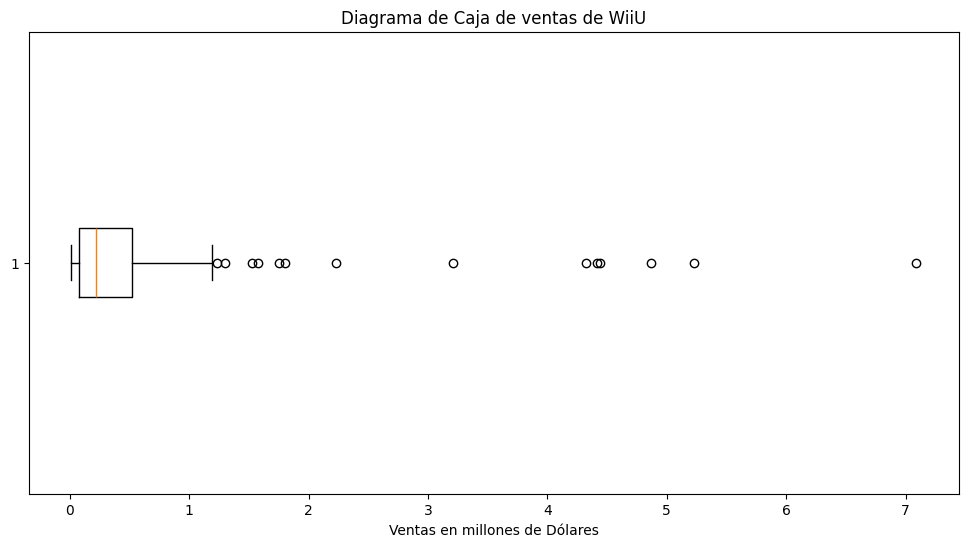

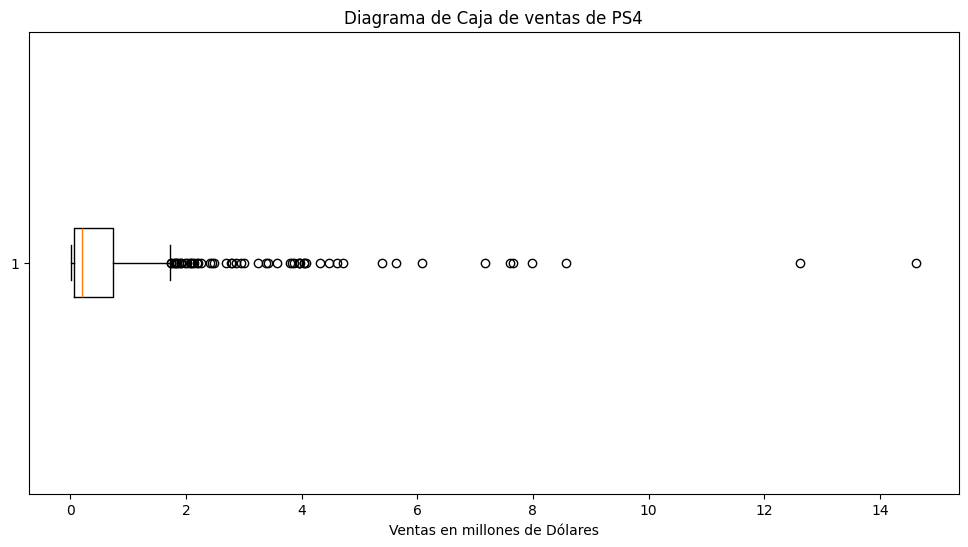

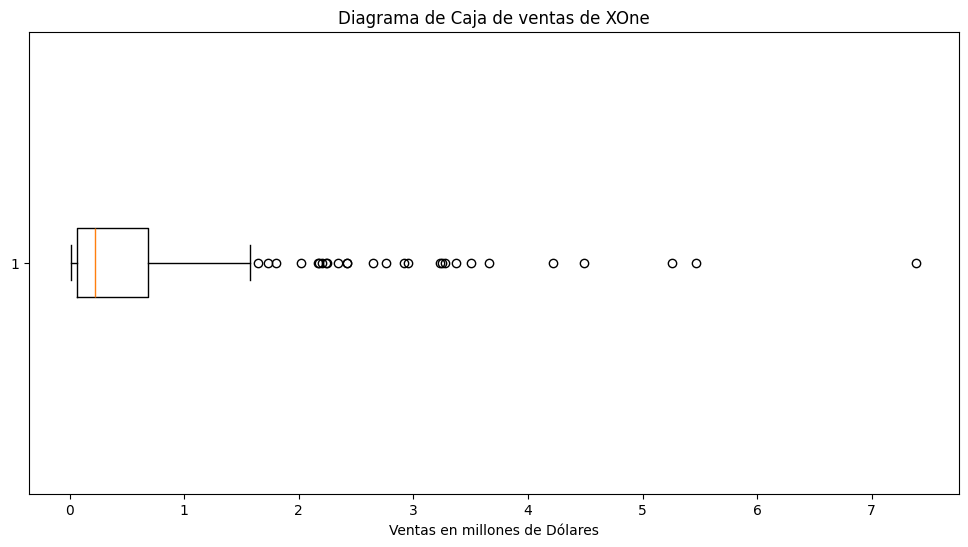

In [15]:
for platform in games_since_2006['platform'].unique():
    df_filtered = games_since_2006[games_since_2006['platform'] == platform]
    df_filtered = df_filtered[df_filtered['total_sales'] > 0]
    plt.figure(figsize=(12, 6))
    plt.boxplot(df_filtered['total_sales'], vert=False)
    plt.title(f'Diagrama de Caja de ventas de {platform}')
    plt.xlabel('Ventas en millones de Dólares')
    plt.show()
    

En las plataformas más exitosas el promedio de ventas de los juegos se encuentra muy abajo, y hay juegos que solos hacen mucho más dinero que al promedio de 100 juegos, por lo que aquí se entiende la necesidad de las plataformas de unos juegos exclusivos, y unos juegos estelares que se esperen, hay que recordar que hay juegos en la industria que se vendieron varias veces como Skyrim, o juegos que se remasterizaron y volvieron a venderse como nuevos como el nuevo Obvlivion, o el mismo GTAV, no es raro ver que los valores se vuelvan extremos tan rápido, y de hecho estos valores extremos enseñan el éxito de la plataforma, o de los juegos en particular, podemos ver que en plataformas como Xbox One el promedio está mucho mejor distribuido que en plataformas como el DS, pero hay que tomar en cuenta que eso habla de los últimos años, y que el PS4 y el Xbox One no han tenido el tiempo de explotar en esta gráfica el máximo potencial de capitalización de juegos.

### 7.- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

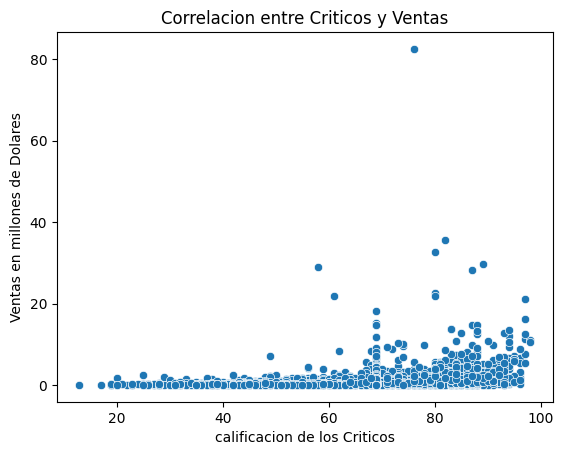

La correlacion entre Criticos y Ventas es de 0.21523205669834583
La correlacion entre Usuarios y Ventas es de 0.0510142640891699


In [16]:
correlation_criticos = games_since_2006['critic_score'].corr(games_since_2006['total_sales'])
correlation_usuarios = games_since_2006['user_score'].corr(games_since_2006['total_sales'])
sns.scatterplot(x=games_since_2006['critic_score'], y=games_since_2006['total_sales'])
plt.title('Correlacion entre Criticos y Ventas')
plt.xlabel('calificacion de los Criticos')
plt.ylabel('Ventas en millones de Dolares')
plt.show()
print(f'La correlacion entre Criticos y Ventas es de {correlation_criticos}')
print(f'La correlacion entre Usuarios y Ventas es de {correlation_usuarios}')

Podemos vere que un juego no es realmente afectado de sobre manera por las rese;as, ni de críticos ni de usuarios.

Los críticos teniendo más efecto en las compras no tienen una buena corrlación, probablemente esto cambiaría si sacaramos datos extremos, pero de todas formas podemos ver que los juegos que más se venden de todas formas son los juegos que están arriba en las críticas, aunque también hay muchos juegos que la crítica califica arriba y no se venden tanto.

Revisé la gráfica pero no voy a hacer perder el tiempo, es semejante salvo que los juegos mejor calificados tienen una tendencia menor, es curioso que el usuario tenga menos poder aún en su calificación respecto al destino del juego, hay excepciones puntuales en la industria, donde en juegos como Dark Souls, la crítica de usuarios lo llevó a dar publicidad solo, y luego juegos que fueron estafas son tapados, pero son realmente casos extremos que no ayudan a la estadística como tal, lo que podemos ver incluso en el número es que la correlación siendo más baja hace que los usuarios casi no tengan influencia comúnmente en la venta de los videojuegos.

### 8.- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [17]:
games_per_platform = games_since_2006.groupby('name')['platform'].nunique().reset_index()
games_per_platform.columns = ['name', 'platforms']
multi_platform_games = games_per_platform[games_per_platform['platforms'] > 1]['name']
multi_platform_game_data = games_since_2006[games_since_2006['name'].isin(multi_platform_games)]
sales_pivot = multi_platform_game_data.pivot_table(index='name', columns='platform', values='total_sales')
sales_pivot = sales_pivot.fillna(0)
sales_pivot['total_sales'] = sales_pivot.sum(axis=1)
print(sales_pivot.head(10))




platform                              3DS    DS  GBA   GC    PC   PS2   PS3  \
name                                                                          
 Frozen: Olaf's Quest                0.59  0.51  0.0  0.0  0.00  0.00  0.00   
007: Quantum of Solace               0.00  0.13  0.0  0.0  0.02  0.43  1.15   
11eyes: CrossOver                    0.00  0.00  0.0  0.0  0.00  0.00  0.00   
2010 FIFA World Cup South Africa     0.00  0.00  0.0  0.0  0.00  0.00  1.23   
2014 FIFA World Cup Brazil           0.00  0.00  0.0  0.0  0.00  0.00  0.61   
25 to Life                           0.00  0.00  0.0  0.0  0.00  0.42  0.00   
3rd Super Robot Wars Z Jigoku Hen    0.00  0.00  0.0  0.0  0.00  0.00  0.23   
3rd Super Robot Wars Z: Tengoku-Hen  0.00  0.00  0.0  0.0  0.00  0.00  0.15   
428: Fuusa Sareta Shibuya de         0.00  0.00  0.0  0.0  0.00  0.00  0.02   
50 Cent: Blood on the Sand           0.00  0.00  0.0  0.0  0.00  0.00  0.20   

platform                             PS4   PSP   PS

Es claro por la tabla anterior que no a todos los juegos les va igual en todas las plataformas, en PC por lo general podemos ver que se vende menos, y en plataformas de xbox no les va igual que en el DS, el ejemplo que tenemos es 007: Quantum Solace del cual en un total de ventas de 3.80 millones 0.02 viene de la PC pero 1.15 viene del PS3 y 1.48 viene del Xbox360 lo que significa que casi el 70% de sus ventas salieron unicamente de dos consolas, y hay que mencionar, las más populares de su época.

Si quisieramos comparar más cercanamente hay versiones que se liberan años después, pero el DF sería enorme para tener todos los datos necesarios, esto sería interesante porque podemos ver si hubo algún lanzamiento adelantado en alguna plataforma, o hubo algún atraso en otra y cómo afectaron a las ventas.

### 9.- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [18]:
genre_sales = games_since_2006.groupby('genre')['total_sales'].sum().reset_index()
genre_sales.columns = ['genre', 'total_sales']
genre_sales.sort_values(by='total_sales', ascending=False, inplace=True)
print(genre_sales)


           genre  total_sales
0         Action      1144.30
10        Sports       815.45
8        Shooter       728.13
3           Misc       567.08
7   Role-Playing       525.88
6         Racing       304.18
4       Platform       281.96
9     Simulation       222.66
2       Fighting       193.29
1      Adventure       145.61
5         Puzzle        92.60
11      Strategy        74.80


In [19]:
games_per_genre = games_since_2006.groupby('genre').size().reset_index(name='games_per_genre')
combined = pd.merge(genre_sales, games_per_genre, on='genre')
combined['average_sales'] = combined['total_sales'] / combined['games_per_genre']
combined.sort_values(by='average_sales', ascending=False, inplace=True)
print(combined)



           genre  total_sales  games_per_genre  average_sales
2        Shooter       728.13              764       0.953050
6       Platform       281.96              350       0.805600
1         Sports       815.45             1304       0.625345
5         Racing       304.18              585       0.519966
4   Role-Playing       525.88             1013       0.519131
0         Action      1144.30             2444       0.468208
8       Fighting       193.29              425       0.454800
3           Misc       567.08             1282       0.442340
7     Simulation       222.66              622       0.357974
10        Puzzle        92.60              377       0.245623
11      Strategy        74.80              403       0.185608
9      Adventure       145.61             1033       0.140958


Estuve tentado por un momento en quedarme solamente con los profits totales, pero si quería saber realmente cuál era más rentable se tenía que hacer la división por juego, mostrando que en realidad los juegos más rentables son simn lugar a dudas los shooters, y de ahí bajan, Action en la anterior muestra que es el género que más dinero ha hecho, pero en la última muestra que son juego medianamente rentables, lo que significa que esos juegos se producen mucho más pero que no son tan rentables juego por juego, en todo caso si lo vemos desde la perspectiva de producción, si es más fácil hacer aventura eso puede ser considerado un dato importante para decidir la rentabilidad con los gastos que esté dispuesto el cliente a asumir.

La última gráfica muestra claramente cómo por género los juegos son más rentables, y la primera muestra cuánto dinero se ha hecho por género, lo que podría ser un dato interesante que no tenemos para profundizar más en la rentabilidaad es saber el costo de cada juego, así sabremos si hay margen de ganancias o solamente están en equilibrio.

# Perfiles de usuario por region
Para cada región (NA, UE, JP) determina:


### 1.- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [20]:
platform_sales_na = games_since_2006.groupby('platform')['na_sales'].sum().reset_index()
platform_sales_na.columns = ['platform', 'na_sales']
platform_sales_na.sort_values(by='na_sales', ascending=False, inplace=True)
print(platform_sales_na.head(5))

   platform  na_sales
17     X360    595.57
15      Wii    496.90
11      PS3    393.49
3        DS    326.08
10      PS2    125.81


In [21]:
platform_sales_ue = games_since_2006.groupby('platform')['eu_sales'].sum().reset_index()
platform_sales_ue.columns = ['platform', 'eu_sales']
platform_sales_ue.sort_values(by='eu_sales', ascending=False, inplace=True)
print(platform_sales_ue.head(5))

   platform  eu_sales
11      PS3    330.29
17     X360    270.33
15      Wii    262.21
3        DS    143.47
12      PS4    141.09


In [22]:
platform_sales_jp = games_since_2006.groupby('platform')['jp_sales'].sum().reset_index()
platform_sales_jp.columns = ['platform', 'jp_sales']
platform_sales_jp.sort_values(by='jp_sales', ascending=False, inplace=True)
print(platform_sales_jp.head(5))

   platform  jp_sales
3        DS    142.04
1       3DS    100.67
11      PS3     80.19
13      PSP     71.53
15      Wii     69.33


En Japón lo que tenemos es un dominio total de DS y 3DS que hay que recordar son las consolas que son natales de Japón, a diferencia de Norte América donde el Xbox domina pero luego aparece el wii, que también es nativo de Japón, y lo curioso es que en Jaón aparece hasta el quinto lugar, lo que nos habla de los accesos de mercado a través de las diferentes consolas.

Si quisieras direccionar un juego por región claro que la consola es un acceso importante, ya que hasta en Europa podemos ver que la consola más importante es primero el PS3 y luego el xbox, entonces, si quisieras entrar a un mercado occidental tienes que entrar por xbox o por PS y Japón quiso entrar con el Wii, y si quisieras entrar a un mercado oriental tienes que buscar entrar en DS o 3DS y luego está el PS, y así podemos buscar la plataforma más rentable entre los tres, porque si quisiearas entrar a los tres mercados por igual puedes intentarlo a través del PS3, aquí falta ver cómo se desarrollan las consolas de última categoría, pero no creo que sea tan diferente en proyección a futuro.

Es importante tomar en cuenta en este mercado las consolas de última categoría porque para este momento llevan poco tiempo en acción y la vida útil de las consolas es de aprox 10 años, así que el xbox360 y PS3 dejarán de recibir juegos nuevos en pocos años, sabeidnoq eu la pauesta será sacarlos para PS3 y PS4 así como para Xbox360 como para XboxOne hasta que se deje a las consolas de anterior generación en paz.

### 2.- Los cinco géneros principales. Explica la diferencia.

In [23]:
genre_sales_na = games_since_2006.groupby('genre')['na_sales'].sum().reset_index()
genre_sales_na.columns = ['genre', 'na_sales']
genre_sales_na.sort_values(by='na_sales', ascending=False, inplace=True)
print(genre_sales_na.head(5))

           genre  na_sales
0         Action    546.28
10        Sports    409.87
8        Shooter    380.54
3           Misc    292.76
7   Role-Playing    200.40


In [24]:
genre_sales_eu = games_since_2006.groupby('genre')['eu_sales'].sum().reset_index()
genre_sales_eu.columns = ['genre', 'eu_sales']
genre_sales_eu.sort_values(by='eu_sales', ascending=False, inplace=True)
print(genre_sales_eu.head(5))

      genre  eu_sales
0    Action    358.84
10   Sports    257.01
8   Shooter    241.71
3      Misc    149.02
6    Racing    115.41


In [25]:
genre_sales_jp = games_since_2006.groupby('genre')['jp_sales'].sum().reset_index()
genre_sales_jp.columns = ['genre', 'jp_sales']
genre_sales_jp.sort_values(by='jp_sales', ascending=False, inplace=True)
print(genre_sales_jp.head(5))

           genre  jp_sales
7   Role-Playing    172.40
0         Action    103.36
3           Misc     65.62
10        Sports     49.58
4       Platform     35.32


Podemos ver en en occidente el mercado de los videojuegos es casi exactamente el mismo en los primeros lugares, salvo por Role-Play y Misc, esa información serviría para empresas especializadas en esta clase de géneros de videojuegos.

El mercado Japonés por otro lado es diferente, teniendo Role-play en primer lugar, y teniendo Platform en quinto, que no aparece en ningún otro mercado en la lista.

Esto nos habla que las empresas de Videojuegos basándose en los géneros de su empresa pueden apostar más por un mercado o por otro a nivel de consumo general.

Podríamos hacer más exaustivo el análisis desglozando con una base de datos que saque el promedio de rentabilidad como lo hice anteriormente para saber si son realmente los más rentables y no solo los generos principales que se tienen, porque en los juegos de plataforma son fáciles de hacer en general y su rentabilidad debería ser buena comparada con su costo de producción.

### 3.- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [26]:
clasification_sales_na = games_since_2006.groupby('rating')['na_sales'].sum().reset_index()
clasification_sales_na.columns = ['rating', 'na_sales']
clasification_sales_na.sort_values(by='na_sales', ascending=False, inplace=True)
print(clasification_sales_na)

    rating  na_sales
0        E    815.73
3        M    579.92
5        T    436.29
1     E10+    323.22
6  Unknown    289.34
2       EC      1.32
4       RP      0.00


In [27]:
clasification_sales_eu = games_since_2006.groupby('rating')['eu_sales'].sum().reset_index()
clasification_sales_eu.columns = ['rating', 'eu_sales']
clasification_sales_eu.sort_values(by='eu_sales', ascending=False, inplace=True)
print(clasification_sales_eu)

    rating  eu_sales
0        E    467.47
3        M    402.87
5        T    240.68
6  Unknown    230.84
1     E10+    178.52
4       RP      0.08
2       EC      0.00


In [28]:
clasification_sales_jp = games_since_2006.groupby('rating')['jp_sales'].sum().reset_index()
clasification_sales_jp.columns = ['rating', 'jp_sales']
clasification_sales_jp.sort_values(by='jp_sales', ascending=False, inplace=True)
print(clasification_sales_jp)

    rating  jp_sales
6  Unknown    281.88
0        E    120.51
5        T     84.60
3        M     44.45
1     E10+     36.57
2       EC      0.00
4       RP      0.00


Sería bueno saber el tema de los "unknown" porque ayudaría a ver si la distribución cambia.

De ahí en fuera podemos ver que en todas las regiones la venta de videojuegos por clasificación es prácticamente la misma, entendiendo que sí, hay un género que más y que menos se vende, casi en todas la regiones con la misma distribución, y esto hace que, no importando en la región en la que estés, la clasificación E es la que más se va a vender, y cerca de eso están M y T, luego E+10 y resagados en todas las regiones RP y EC lejos de cualquier punto.

# Hipotesis a probar 
— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

valor de umbral alfa = 0.05

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

### Hipótesis 1

-Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

-Hipótesis alternativa:La calificación promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [29]:
xone_reviews = games_since_2006[games_since_2006['platform'] == 'XOne'].groupby('name')['critic_score'].mean().reset_index()
pc_reviews = games_since_2006[games_since_2006['platform'] == 'PC'].groupby('name')['critic_score'].mean().reset_index()
result_reviews_platform = st.ttest_ind(xone_reviews['critic_score'], pc_reviews['critic_score'], equal_var=False)
alpha = 0.05
if result_reviews_platform.pvalue < alpha:
    print('Rechazamos la hipotesis nula, dado que hay una diferencia significativa en las calificaciones entre las plataformas.')
else:
    print('No se puede rechazar la hipotesis nula, dado que no hay una diferencia significativa en las calificaciones entre las plataformas.')
print(f'El valor p es {result_reviews_platform.pvalue}')

No se puede rechazar la hipotesis nula, dado que no hay una diferencia significativa en las calificaciones entre las plataformas.
El valor p es 0.11092250449676515


### Hipótesis 2

-Hipótesis nula: La calificación promedio de los usuarios para los géneros de Acción y Deportes son iguales.

-Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [30]:
action_reviews = games_since_2006[games_since_2006['genre'] == 'Action'].groupby('name')['critic_score'].mean().reset_index()
sport_reviews = games_since_2006[games_since_2006['genre'] == 'Sports'].groupby('name')['critic_score'].mean().reset_index()
result_reviews_genre = st.ttest_ind(action_reviews['critic_score'], sport_reviews['critic_score'], equal_var=False)
if result_reviews_genre.pvalue < alpha:
    print('Rechazamos la hipotesis nula, dado que hay una diferencia significativa en las calificaciones entre los generos.')
else:
    print('No se puede rechazar la hipotesis nula, dado que no hay una diferencia significativa en las calificaciones entre los generos.')
    print(f'El valor p es {result_reviews_genre.pvalue}')

No se puede rechazar la hipotesis nula, dado que no hay una diferencia significativa en las calificaciones entre los generos.
El valor p es 0.09744286518889615


La primer hipótesis no es rechazada porque con el alhpa dado no se encuentra suficiente diferencia para que se rechace, lo que significa que estadísticamente hablando sí podrían ser iguales las aclificaciones entre PC y Xbox, lo que hablaría de que en realidad lo que se está calificando es el juego y no la plataforma.

En la Segunda hipótesis a probar encontramos que tenemos una desigualdad que es técnicamente rechazada, porque no se puede rechazar la hipótesis nula, ya que con el alpha dado podemos encontrar que en los diferentes géneros de los videojuegos se tiene demostrando que el promedio de las calificaciones está evaluendo el videojuego y no el género del videojuego, lo que hace muestra de que las críticas están mostrando una inparcialidad.

Esto muestra que la crítica muestra imparcialidad en género, y en plataforma, que lo que realmente se está evaluando es la experiencia de juego.

# Conclusiones

Podemos ver que aunque las críticas evalúan realmente la experiencia de videojuego independientemente del género o de la plataforma, esto no es suficiente como para influir de manera absolutamente determinante en el éxito de un juego, así que no podemos predecir con base en las críticas si le irá bien o no a un juego en cuestión basándonos en las críticas.

La tendencia muestra una baja considerable en ventas, lo que mostraría inprobable que en el 2017 la tendencia subiera, esto está en todas las plataformas, a menos que alguna plataforma en específico mostrara tener algún juego exclusivo que estuviera siendo esperado, eso ayudaría a subir las ventas, de aquí la lógica de la batalla de PS y xbox, por lo que tendríamos que avaluar eso para poder predecir con más certidumbre subida o bajada en las ventas, aunque con los datos dados lo más probable es que sea una bajada.

Ahora, si una empresa productora de videojuegos quisiera entrar a alguna región en específico de las principales tres, tendríamos que hablar de qué región para recomendarle una  plataforma, y si quisiera entrar a Japón, qué género es más conveniente en general.

Exclusivcamente en términos de análisis de datos sé que probablemente lo más convieniente hubiera sido colocar toda la base de datos en minúsculas, lo que en esta ocasión me di cuenta un poco más allá de la mitad del análisis, por lo que preferí dejarlo en mayúsculas por comodidad en esta ocasión, aunque en futuras ocasiones debo recordar que por comodidad debería colocarlo en minúsculas, y posteriormente si quisiera demostrar algún resultado puedo convertir el texto con title.

En el caso específico de los diagramas de caja brasos tardé en darme cuenta que las cosas las había hecho de manera correcta, entendiendo que en esta industria hay demasiados datos extremos pero que deben ser conservados para el análisis presiso, ya que estos datos extremos nos pueden dar información valiosa, y son tantos que en cualquier caso deberíamos de ver estos datos extremos para el análisis más a profundidad de la industria de videojuegos en caso de ser buscado.

Si quisieramos hacer análisis más exaustivo podríamos agragar lgunos datos extras, como los años de lanzamiento de los videojuegos, o las fechas que se esperan sean la caducidad de las plataformas anteriores, así como si tenemos plataformas nuevas a la vista, los juegos exclusivos, y los juegos exclusivos que se esperarían para los siguientes años, pero los datos tendrían que ser analizados de otra manera para llegar a conclusiones predictivas interesantes y no tan sesgadas.